<a href="https://colab.research.google.com/github/v4gadkari/RedditTopicModeling/blob/main/BDAART_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BDAART Sentiment Analysis on Reddit Comments

The goal of this project is to conduct analysis on Reddit Comments to explore the occurence of racial bias towards delivery drivers.

Since the pandemic hit back in March, the demand for food delivery has skyrocketed. Local businesses which closed down dining within the restaraunts have looked to an alternative to deliver food to customers: Door Dash

As a team we will investigate how the general public has reacted to the influx of delivery drivers, and to see what kinds of comments have made about individual delivery driver experience to reveal if there is any racial bias in their comments.

# Package Imports


My go to software for any kind of data analysis work has been Python. 

The packages I used for data cleaning, feature extraction,  and model fitting were:
*   Pandas
*   Sklearn
*   VaderSentiment - Used to do LDA in retrieving valence scores from comments




For Data Visualizations, I chose to import one of my favorite visualization tools from the tidyverse package in R:
*   ggplot2


In order to visualize the topics in my topic modeling, I used pyLDAvis to give a summary of the top terms in each topics and each words prevalence. 


In order to use R in a colab notebook I had to run a magic command to import it
and then specify %%R in the cell where I was using R.







In [ ]:
import pandas as pd
import numpy as np


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('tidyverse')

In [ ]:
%%R
library(ggplot2)
library(tidyverse)
library(dplyr)

In [ ]:
import nltk

In [ ]:
pip install pyldavis

In [ ]:
import pyLDAvis.sklearn

In [ ]:
nltk.download('all')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns


In [ ]:
pip install vaderSentiment

In [ ]:
comment_df = pd.read_csv("/content/drive/MyDrive/BDAARTProject/flat-comment-df.csv")




# Original Comment Data Frame

Gives an overview of the features related to each comment.

The one of most interest to us, and the ones which we will focus our analysis is on the Comments.




In [ ]:
comment_df

,Unnamed: 0,PK,Title,URL,Time,Comment_PK,Comments,Comment_Time,Comment_Score,Is_Root_Comment,Comment_Parent
0,0,g377oe,Will they or won't they tip??? Stay Tuned!,https://redd.it/g377oe,2020-04-17 18:07:56,fnpkd6b,What are you delivering to them??,2020-04-17 18:10:26,1,True,t3_g377oe
1,1,g377oe,Will they or won't they tip??? Stay Tuned!,https://redd.it/g377oe,2020-04-17 18:07:56,fnpkwzb,"I vote no, absolutely not",2020-04-17 18:15:05,1,True,t3_g377oe
2,2,g377oe,Will they or won't they tip??? Stay Tuned!,https://redd.it/g377oe,2020-04-17 18:07:56,fnpl59n,"Also follow up question, anyone know why peopl...",2020-04-17 18:17:00,14,True,t3_g377oe
3,3,g377oe,Will they or won't they tip??? Stay Tuned!,https://redd.it/g377oe,2020-04-17 18:07:56,fnpl8d9,"Yeah, that's typically a sign for the ""lovely""...",2020-04-17 18:17:44,11,True,t3_g377oe
4,4,g377oe,Will they or won't they tip??? Stay Tuned!,https://redd.it/g377oe,2020-04-17 18:07:56,fnpmucw,Jesus was a Jew and we all know how they tip.....,2020-04-17 18:31:19,-1,True,t3_g377oe
...,...,...,...,...,...,...,...,...,...,...,...
417839,417839,gb0mxu,I'm so happy now,https://redd.it/gb0mxu,2020-04-30 17:54:50,fp3fn3w,Lol no waaaay where are you at?,2020-04-30 20:27:51,1,True,t3_gb0mxu
417840,417840,gb0mxu,I'm so happy now,https://redd.it/gb0mxu,2020-04-30 17:54:50,fp3opsb,Same thing for me,2020-04-30 21:44:15,1,True,t3_gb0mxu
417841,417841,gb0mxu,I'm so happy now,https://redd.it/gb0mxu,2020-04-30 17:54:50,fp3qnqk,Yuck,2020-04-30 22:00:45,1,True,t3_gb0mxu
417842,417842,gb0mxu,I'm so happy now,https://redd.it/gb0mxu,2020-04-30 17:54:50,fp3qpds,"Mine is $11 (Miami) and it's insulting, tbh",2020-04-30 22:01:08,1,True,t3_gb0mxu


In [ ]:
comment_df.info()

In [ ]:
comment_df['Comments'] = comment_df['Comments'].astype(str)

In [ ]:
comment_df['Comments'].value_counts()

# Search Terms to filter our DF


We want to make sure out dataset is filtered to the samples of interest to us.

There are too many comments which do not include the type of racial bias we are looking for, so creating an array of search terms to filter our data will help us work with a smaller universe of comments.

In [ ]:
search_terms = ['race', 'racist', 'racism', 'discrimination', 'black', 'white', 'colored', 'caucasian', 'suspicious']


search_terms_results = comment_df[comment_df['Comments'].str.contains('|'.join(search_terms))]


In [ ]:
search_terms_results

,Unnamed: 0,PK,Title,URL,Time,Comment_PK,Comments,Comment_Time,Comment_Score,Is_Root_Comment,Comment_Parent
630,630,guoyuh,My weekly summary adds up to $956.26 but my de...,https://redd.it/guoyuh,2020-06-01 17:35:48,fsjs8pt,You should get it man. Also keep in mind there...,2020-06-01 18:11:33,3,False,t1_fsjrr3u
666,666,gup8n0,Postmates encourages making mistakes!,https://redd.it/gup8n0,2020-06-01 17:50:40,fsm5b7q,I've been on both sides of the chargeback game...,2020-06-02 07:51:56,1,False,t1_fslto6o
966,966,fshgt1,Lol,https://redd.it/fshgt1,2020-03-31 17:45:09,fm3gjaj,By the way. When you said people that don't ti...,2020-04-01 06:32:50,0,True,t3_fshgt1
1608,1608,gbzdoc,Well everyone. My first controversial delivery...,https://redd.it/gbzdoc,2020-05-02 03:14:19,fp8kqba,They don't need either in any state it can be ...,2020-05-02 04:48:13,1,False,t1_fp8dz0u
1615,1615,gbzdoc,Well everyone. My first controversial delivery...,https://redd.it/gbzdoc,2020-05-02 03:14:19,fp968s1,I really don't have any clue why I'm getting d...,2020-05-02 10:38:54,4,False,t1_fp8p0fs
...,...,...,...,...,...,...,...,...,...,...,...
417527,417527,g1muwh,Things that help you make more $. Ex. Income m...,https://redd.it/g1muwh,2020-04-15 06:56:34,fnglu6n,"no, I'm saying ops circle is excluded the blac...",2020-04-15 07:41:01,2,False,t1_fngl5bk
417529,417529,g1muwh,Things that help you make more $. Ex. Income m...,https://redd.it/g1muwh,2020-04-15 06:56:34,fnh94qr,Those are the neighborhoods where you are most...,2020-04-15 13:35:59,4,False,t1_fnglu6n
417570,417570,gagucm,"First tip of the day, where should I spend it ...",https://redd.it/gagucm,2020-04-29 20:20:11,fozn0lt,stocks of blackberry and hold that shit,2020-04-29 20:49:43,-1,True,t3_gagucm
417716,417716,gamr9t,A questions for female postmaters!,https://redd.it/gamr9t,2020-04-30 01:57:47,fp1k2y5,Male or Female bright colors and confidence he...,2020-04-30 09:16:52,1,True,t3_gamr9t


# Tokenization

This is an important when doing sentiment analysis, as it allows us to build wordclouds, as well be of use when building vectorizers later on. 

Tokenization involves the process of chopping up a sentence into individual character sequences. This allows us to attach a score to each word when doing LDA in sklearn. 

Note: Tokenization is not needed as a step when using the Vader package. 

In [ ]:
word_tokens = [word_tokenize(comment) for comment in search_terms_results['Comments']]

In [ ]:
word_tokens

# Stop Words

Eliminating stop words is key to removing unecssary tokens which may add no value to our sentiment analysis engine.

Stop Words are words which are recurring and generally don't provide new information in our topic modeling. For example, words like:

 "a", "and", "for" , "to" 
 
 are words which are very common in the english language, and may appear frequently in word clouds. However they are not imporant for understanding if there is racial bias. The English StopWords package allows us to customize the original set of stop words and add out own.

In [ ]:
my_stop_words = ENGLISH_STOP_WORDS.union(['just', 
                                          'it',
                                          'a',
                                          'as',
                                          'on',
                                          'haha',
                                          'lol',
                                          'to',
                                          '.',
                                          'it\'s',
                                          'app',
                                          'like',
                                          'I\'m',
                                          'that',
                                          'drive',
                                          'drivers',
                                          'driving',
                                          'order',
                                          'right',
                                          'you\'re',
                                          'said',
                                          'got',
                                          'don\'t',
                                          'that',
                                          'dude',
                                          'going',
                                          'make',
                                          'thing',
                                          'think',
                                          'come',
                                          'way',
                                          'time',
                                          'I\'ve',
                                                                             
                                          
                                          ])

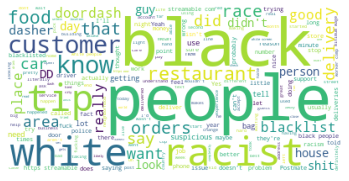

In [ ]:



comments_cloud = WordCloud(background_color='white', stopwords=my_stop_words).generate(" ".join(comment for comment in search_terms_results['Comments']))

plt.imshow(comments_cloud)
plt.axis('off')

plt.show()


In [ ]:
more_stop_words = my_stop_words.union(['say',
                     'want',
                     'lot',
                     'tell',
                     'probably',
                     'support',
                     'did',
                     'going',
                     'lol'])

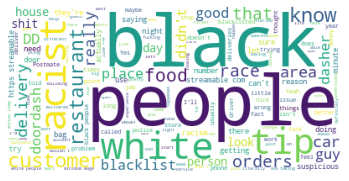

In [ ]:

comments_cloud = WordCloud(background_color='white', stopwords=more_stop_words).generate(" ".join(comment for comment in search_terms_results['Comments']))

plt.imshow(comments_cloud)
plt.axis('off')

plt.show()

In [ ]:
even_more_stop_words = my_stop_words.union(['red', 
                     'man',
                     'there',
                     'know',
                     'say',
                     'want',
                     'really',
                     'that',
                     'actually',
                     'did',
                     'day',
                     'area',
                     'restaurant',
                     'LOL'])

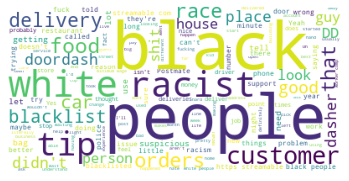

In [ ]:
comments_cloud = WordCloud(background_color='white', stopwords=even_more_stop_words).generate(" ".join(comment for comment in search_terms_results['Comments']))

plt.imshow(comments_cloud)
plt.axis('off')

plt.show()

# VaderSentiment

Vader is a package which allows us to get valence scores for comments in our dataset. 

What are Valence Scores?

Valence Scores are given on a range from -1 to 1, where -1 is the most negative and 1 is the most positve comment. 

The polarity scores function associated with Vader returns the valence scores of the comments as separate columns in the dataframe, known as:



*   Positive Comments
*   Negative Comments
*   Neutral Comments
*   Compound Comments - think of it as a sum of all normalized ratings 







In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
columns = ['PK',	'Title', 'URL', 'Time', 'Comment_PK',	'Comments',	'Comment_Time', 'Comment_Score', 'Is_Root_Comment', 'Comment_Parent', 'Pos_Comment', 'Neg_Comment', 'Neutral_Comment']


vaderSentimentDf = pd.DataFrame(columns=columns)
sei = SentimentIntensityAnalyzer()
for index,comments in search_terms_results.iterrows():
  sentimentDf = sei.polarity_scores(comments['Comments'])
  vaderSentimentDf = vaderSentimentDf.append({'PK':comments['PK'], 'Title':comments['Title'], 'URL':comments['URL'], 'Time':comments['Time'], 'Comment_PK':comments['Comment_PK'], 'Comments':comments['Comments'], 'Comment_Time':comments['Comment_Time'], 'Comment_Score':comments['Comment_Score'], 'Is_Root_Comment':comments['Is_Root_Comment'], 'Comment_Parent':comments['Comment_Parent'], 'Pos_Comment':sentimentDf['pos'], 'Neg_Comment':sentimentDf['neg'], 'Neutral_Comment':sentimentDf['neu'],'Comment_Compound':sentimentDf['compound']}, ignore_index=True)
  
  
vaderSentimentDf

,PK,Title,URL,Time,Comment_PK,Comments,Comment_Time,Comment_Score,Is_Root_Comment,Comment_Parent,Pos_Comment,Neg_Comment,Neutral_Comment,Comment_Compound
0,guoyuh,My weekly summary adds up to $956.26 but my de...,https://redd.it/guoyuh,2020-06-01 17:35:48,fsjs8pt,You should get it man. Also keep in mind there...,2020-06-01 18:11:33,3,False,t1_fsjrr3u,0.088,0.146,0.766,-0.5106
1,gup8n0,Postmates encourages making mistakes!,https://redd.it/gup8n0,2020-06-01 17:50:40,fsm5b7q,I've been on both sides of the chargeback game...,2020-06-02 07:51:56,1,False,t1_fslto6o,0.080,0.068,0.853,0.5336
2,fshgt1,Lol,https://redd.it/fshgt1,2020-03-31 17:45:09,fm3gjaj,By the way. When you said people that don't ti...,2020-04-01 06:32:50,0,True,t3_fshgt1,0.000,0.298,0.702,-0.9163
3,gbzdoc,Well everyone. My first controversial delivery...,https://redd.it/gbzdoc,2020-05-02 03:14:19,fp8kqba,They don't need either in any state it can be ...,2020-05-02 04:48:13,1,False,t1_fp8dz0u,0.086,0.100,0.814,-0.0772
4,gbzdoc,Well everyone. My first controversial delivery...,https://redd.it/gbzdoc,2020-05-02 03:14:19,fp968s1,I really don't have any clue why I'm getting d...,2020-05-02 10:38:54,4,False,t1_fp8p0fs,0.140,0.000,0.860,0.8923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,g1muwh,Things that help you make more $. Ex. Income m...,https://redd.it/g1muwh,2020-04-15 06:56:34,fnglu6n,"no, I'm saying ops circle is excluded the blac...",2020-04-15 07:41:01,2,False,t1_fngl5bk,0.000,0.124,0.876,-0.3400
3224,g1muwh,Things that help you make more $. Ex. Income m...,https://redd.it/g1muwh,2020-04-15 06:56:34,fnh94qr,Those are the neighborhoods where you are most...,2020-04-15 13:35:59,4,False,t1_fnglu6n,0.079,0.129,0.792,-0.5334
3225,gagucm,"First tip of the day, where should I spend it ...",https://redd.it/gagucm,2020-04-29 20:20:11,fozn0lt,stocks of blackberry and hold that shit,2020-04-29 20:49:43,-1,True,t3_gagucm,0.000,0.375,0.625,-0.5574
3226,gamr9t,A questions for female postmaters!,https://redd.it/gamr9t,2020-04-30 01:57:47,fp1k2y5,Male or Female bright colors and confidence he...,2020-04-30 09:16:52,1,True,t3_gamr9t,0.157,0.069,0.774,0.8587


In [ ]:
subset = ['Title', 'Comments', 'Comment_Score', 'Pos_Comment', 'Neg_Comment', 'Neutral_Comment', 'Comment_Compound']

polarity_scores_df = vaderSentimentDf[subset]


polarity_scores_df

,Title,Comments,Comment_Score,Pos_Comment,Neg_Comment,Neutral_Comment,Comment_Compound
0,My weekly summary adds up to $956.26 but my de...,You should get it man. Also keep in mind there...,3,0.088,0.146,0.766,-0.5106
1,Postmates encourages making mistakes!,I've been on both sides of the chargeback game...,1,0.080,0.068,0.853,0.5336
2,Lol,By the way. When you said people that don't ti...,0,0.000,0.298,0.702,-0.9163
3,Well everyone. My first controversial delivery...,They don't need either in any state it can be ...,1,0.086,0.100,0.814,-0.0772
4,Well everyone. My first controversial delivery...,I really don't have any clue why I'm getting d...,4,0.140,0.000,0.860,0.8923
...,...,...,...,...,...,...,...
3223,Things that help you make more $. Ex. Income m...,"no, I'm saying ops circle is excluded the blac...",2,0.000,0.124,0.876,-0.3400
3224,Things that help you make more $. Ex. Income m...,Those are the neighborhoods where you are most...,4,0.079,0.129,0.792,-0.5334
3225,"First tip of the day, where should I spend it ...",stocks of blackberry and hold that shit,-1,0.000,0.375,0.625,-0.5574
3226,A questions for female postmaters!,Male or Female bright colors and confidence he...,1,0.157,0.069,0.774,0.8587


In [ ]:
polarity_scores_df.to_csv('/content/drive/MyDrive/BDAARTProject/polarity_scores_csv')

In [ ]:
%%R

polarity_scores_R_df <- read_csv('/content/drive/MyDrive/BDAARTProject/polarity_scores_csv')




# Exploratory Data Analysis

Lets now take this new dataframe of polarity scores, and do some exploratory data analysis.

I will be switching over to R for a little bit and use ggplot2. 

My goal here is to get an overall feel for the distributions in each of the polarity score categories. 

Note: I chose the median since our distributions had outliers, and the median is the most resistant to outliers and provides a more accurate representation of the average


# Positive Comment Distribution

Here we can see the distribution of positive valence scores in our data. 

Data is skewed right with most of the scores falling between 0 and 0.2, which is almost close to neutral. 

The median is a 0.078, which is a positive comment score which is neutral.



The smooth curve also highlights that the data is bimodally distributed

The distribution is influenced by some high outliers, some of the most positive comments in the data. 

We shall explore to see the top three positive comments in our data.




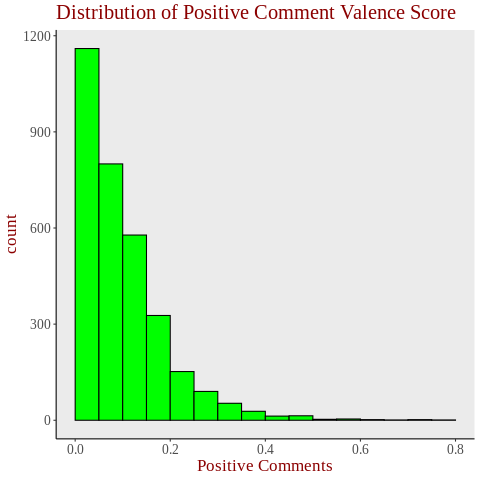

In [ ]:
%%R

pos_comments_viz <- ggplot(polarity_scores_R_df, aes(x=Pos_Comment))

pos_comments_viz + geom_histogram(binwidth=0.05, center = 0.025, fill='green', color='black') + labs(x='Positive Comments', title='Distribution of Positive Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)








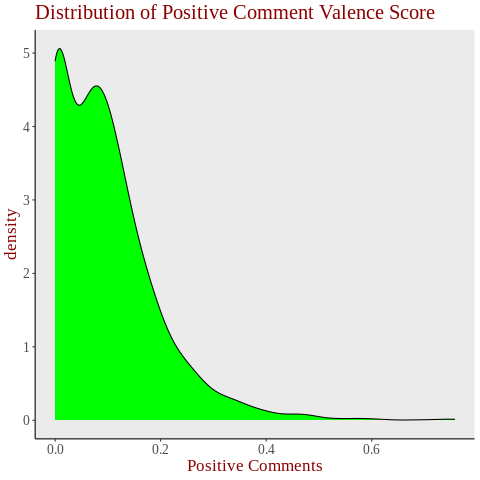

In [ ]:
%%R

pos_comments_viz + geom_density(bw=0.025, fill='green', color='black') + labs(x='Positive Comments', title='Distribution of Positive Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

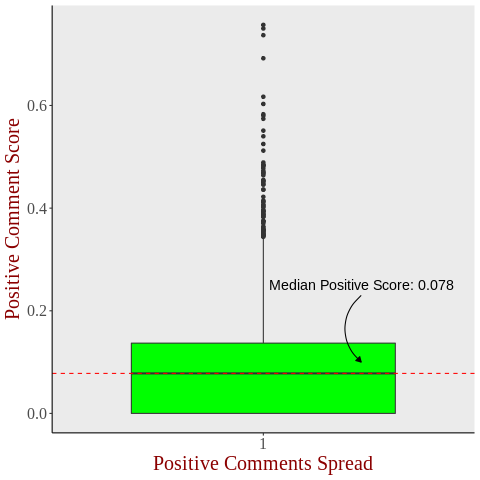

In [ ]:
%%R


                                                                
                                                                                                                              
pos_comment_boxplot <- ggplot(polarity_scores_R_df, aes(x=as.factor(1), y = Pos_Comment)) 

pos_comment_median <- median(polarity_scores_R_df$Pos_Comment)


pos_comment_boxplot + geom_boxplot(fill='green') + 
                    labs(y = 'Positive Comment Score', x = 'Positive Comments Spread') + 
                    geom_hline(yintercept = pos_comment_median, linetype='dashed', color='red') + 
                    annotate("text", x = pos_comment_median + 1.2, y = 0.25, label='Median Positive Score: 0.078', size=5) + 
                    annotate('curve', x = pos_comment_median + 1.2, y = 0.23, xend=pos_comment_median + 1.2, yend=0.1, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)



# Positive Comments Outlier Analysis

Exploring these outliers tells us the top positive comments in our data.

These are very short comments and do not add a whole lot of meaning for Vader to attach an accurate score. Not to mention tokens like 'LOL' are not really helpful.

note: Is there a way to add stopwords to vader?

However, lets readjust the distribution and remove our outliers to see how our distribution changes



In [ ]:
%%R

positive_scores_outliers <- polarity_scores_R_df %>% group_by(Pos_Comment) %>% filter(Pos_Comment > 0.7)

positive_scores_outliers$Comments 







[1] "Oh Grace."         "Grand Terrace"     "Yes I'm white LOL"


# Positive Comment Outlier Cleaning

Simple.

Find the threshold for outliers in the data and remove them with dplyr

Replot the data with ggplot

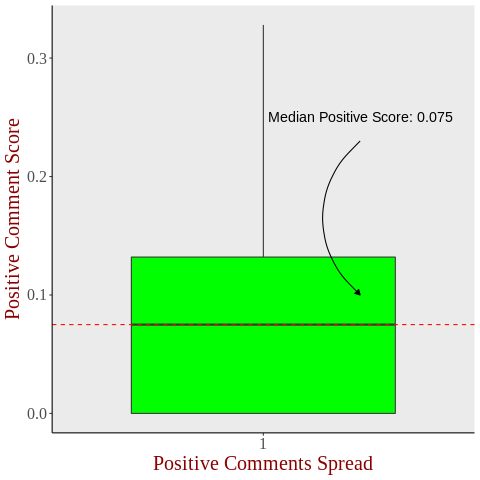

In [ ]:
%%R

#Filter for scores less than 0.33 (threshold for outliers)
positive_scores_without_outliers <- polarity_scores_R_df %>% filter(Pos_Comment < 0.33)


pos_comment_boxplot <- ggplot(positive_scores_without_outliers, aes(x=as.factor(1), y = Pos_Comment)) 

pos_comment_median <- median(positive_scores_without_outliers$Pos_Comment)


pos_comment_boxplot + geom_boxplot(fill='green') + 
                    labs(y = 'Positive Comment Score', x = 'Positive Comments Spread') + 
                    geom_hline(yintercept = pos_comment_median, linetype='dashed', color='red') + 
                    annotate("text", x = pos_comment_median + 1.2, y = 0.25, label='Median Positive Score: 0.075', size=5) + 
                    annotate('curve', x = pos_comment_median + 1.2, y = 0.23, xend=pos_comment_median + 1.2, yend=0.1, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)


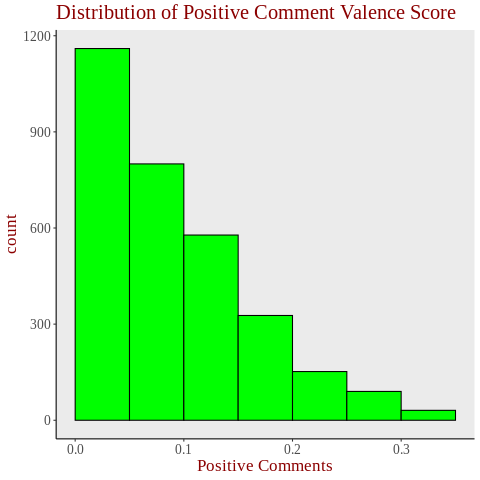

In [ ]:


%%R

pos_comments_viz <- ggplot(positive_scores_without_outliers, aes(x=Pos_Comment))

pos_comments_viz + geom_histogram(binwidth=0.05, center = 0.025, fill='green', color='black') + labs(x='Positive Comments', title='Distribution of Positive Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)


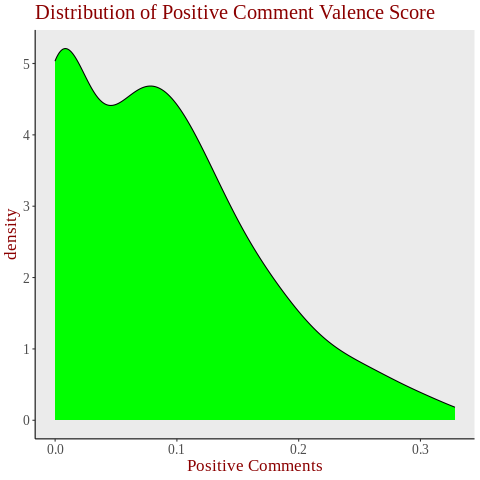

In [ ]:
%%R

pos_comments_viz + geom_density(bw=0.025, fill='green', color='black') + labs(x='Positive Comments', title='Distribution of Positive Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

# Positive Valence Scores Conclusion

Removing the outliers made a slight impact on the shape of our distribution.

There was not much of a difference in the average, a slight drop from 0.078 to 0.075, still near neutral.

In terms of the overall shape, our data still holds the same skewed shape, showing us that a large part of our positive valence scores tend to fall more on the neutral side.

# Negative Comment Distribution

We see the negative valence score distribution take on a very similar shape as the previous distribution, where the data is skewed right with a high number of observations that are near neutral.

One interesting thing to point out is the average score of the negative comment scores had a slightly higher average than the positive comment scores.

The average here is 0.083 which is 0.005 higher than the average positive comment scores before outliers were removed.


We will explore the outliers to see here what the most "negative" scores were. It is hard to really view these as negative comments since they fall above 0. So technically it will be viewing the most positive comments again.

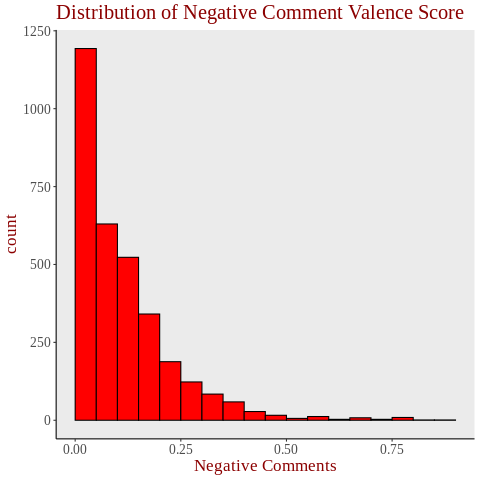

In [ ]:
%%R


neg_comments_viz <- ggplot(polarity_scores_R_df, aes(x=Neg_Comment))

neg_comments_viz + geom_histogram(binwidth=0.05, center=0.025, fill='red', color='black') + labs(x='Negative Comments',title='Distribution of Negative Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)


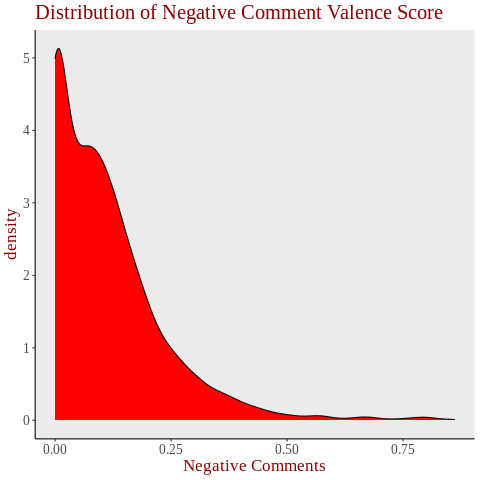

In [ ]:
%%R

neg_comments_viz + geom_density(bw=0.025, fill='red', color='black') + labs(x='Negative Comments',title='Distribution of Negative Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

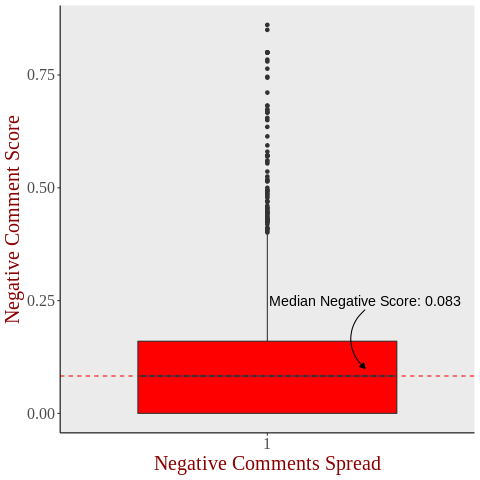

In [ ]:
%%R


                                                                
                                                                                                                              
neg_comment_boxplot <- ggplot(polarity_scores_R_df, aes(x=as.factor(1), y = Neg_Comment)) 

neg_comment_median <- median(polarity_scores_R_df$Neg_Comment)


neg_comment_boxplot + geom_boxplot(fill='red') + 
                    labs(y = 'Negative Comment Score', x = 'Negative Comments Spread') + 
                    geom_hline(yintercept = neg_comment_median, linetype='dashed', color='red') + 
                    annotate("text", x = neg_comment_median + 1.2, y = 0.25, label='Median Negative Score: 0.083', size=5) + 
                    annotate('curve', x = neg_comment_median + 1.2, y = 0.23, xend=neg_comment_median + 1.2, yend=0.1, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)



# Negative Comment Outlier Analysis


I'll be honest, I don't really know why these sentences are given such a high 
valence score.

This is probably because the comments themselves are shorter, so there is not much vader can find to attach an accurate comment score. As well as some parts of the comment which only contribute to a small portion of the score. 

Each of these comments adds the word "racist", which has a valence score of its own but the word "that's" does not carry much weight

In [ ]:
%%R

negative_scores_outliers <- polarity_scores_R_df %>% group_by(Neg_Comment) %>% filter(Neg_Comment >= 0.79)

negative_scores_outliers$Comments

[1] "Stop being racist."         "That's racist."            
[3] "That's racist."             "That's racist"             
[5] "racist af"                  "Fuck off you racist bitch."
[7] "that's racist"              "That's racist"             


# Negative Comments Outlier Cleaning

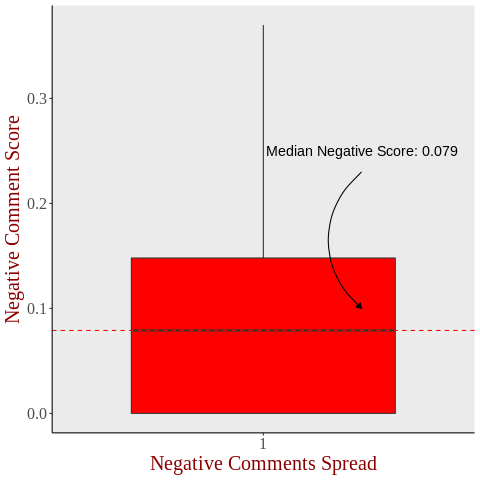

In [ ]:
%%R

negative_scores_without_outliers <- polarity_scores_R_df %>% filter(Neg_Comment <= 0.37)

neg_comment_boxplot <- ggplot(negative_scores_without_outliers, aes(x=as.factor(1), y = Neg_Comment)) 

neg_comment_median <- median(negative_scores_without_outliers$Neg_Comment)


neg_comment_boxplot + geom_boxplot(fill='red') + 
                    labs(y = 'Negative Comment Score', x = 'Negative Comments Spread') + 
                    geom_hline(yintercept = neg_comment_median, linetype='dashed', color='red') + 
                    annotate("text", x = neg_comment_median + 1.2, y = 0.25, label='Median Negative Score: 0.079', size=5) + 
                    annotate('curve', x = neg_comment_median + 1.2, y = 0.23, xend=neg_comment_median + 1.2, yend=0.1, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)





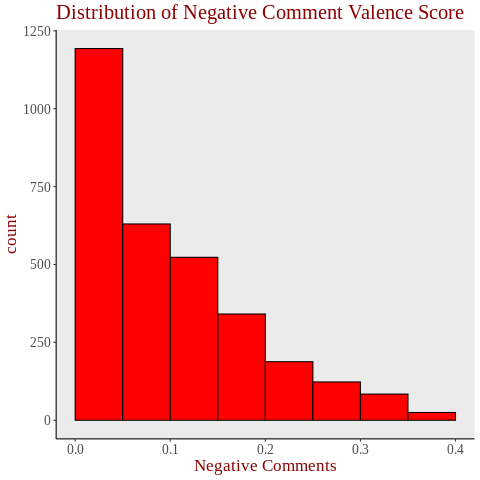

In [ ]:
%%R


neg_comments_viz <- ggplot(negative_scores_without_outliers, aes(x=Neg_Comment))

neg_comments_viz + geom_histogram(binwidth=0.05, center=0.025, fill='red', color='black') + labs(x='Negative Comments',title='Distribution of Negative Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

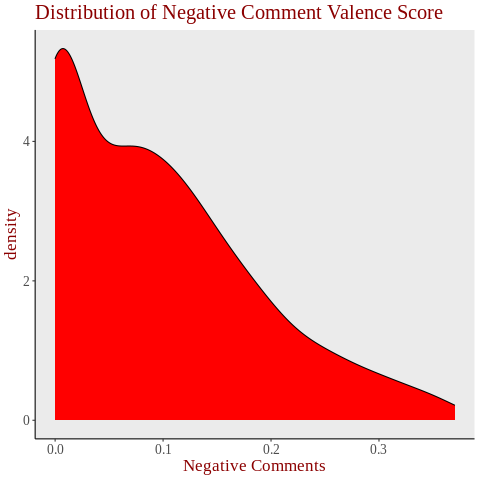

In [ ]:
%%R

neg_comments_viz + geom_density(bw=0.025, fill='red', color='black') + labs(x='Negative Comments',title='Distribution of Negative Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

# Negative Comments Conclusion

As we can see, removing the outliers had a similar effect on the distribution as it did before.

A slight variation in the average:

0.083 to 0.079 after removal.

Overall the the distribution still has its skewed nature, and tends to have  more neutral comment scores.



# Neutral Comment Distribution

The distribution of the neutral valence scores is much different than the previous two distributions.

We see that the neutral comments are skewed left with a high number of scores between 0.75 and 1

The distribution is also bimodally distributed with two peaks

It seems as though these comments labeled as neutral are more so on the positive side than neutral.

The average before outliers were removed was 0.8105.

We shall do outlier analysis to see what the outlier comments were



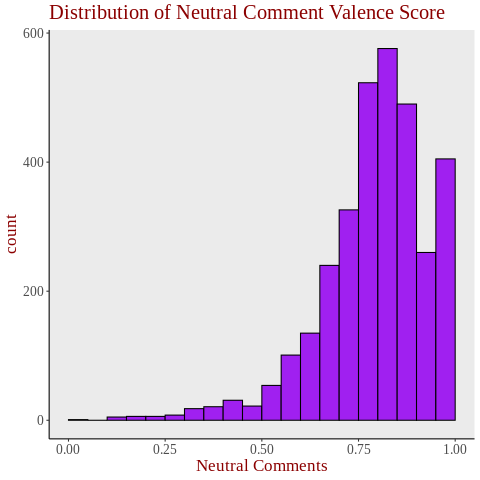

In [ ]:

%%R


neutral_comments_viz <- ggplot(polarity_scores_R_df, aes(x=Neutral_Comment))

neutral_comments_viz + geom_histogram(binwidth=0.05, center=0.025, fill='purple', color='black') + labs(x='Neutral Comments', title='Distribution of Neutral Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)





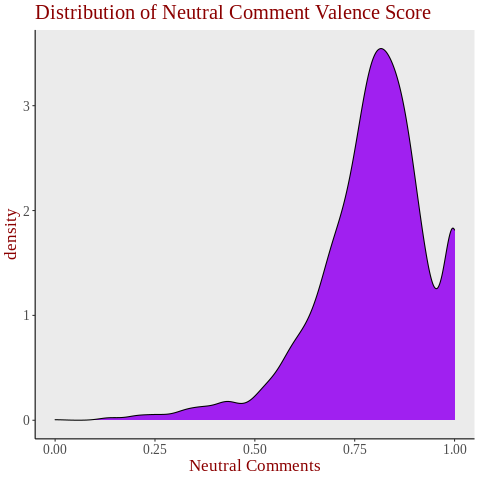

In [ ]:
%%R

neutral_comments_viz + geom_density(bw=0.025, fill='purple', color='black') + labs(x='Neutral Comments', title='Distribution of Neutral Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

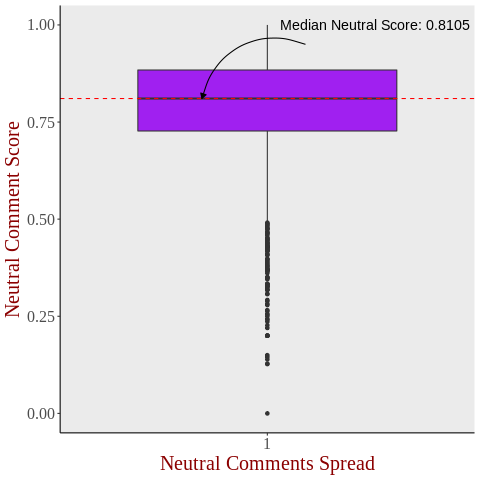

In [ ]:
%%R


                                                                
                                                                                                                              
neu_comment_boxplot <- ggplot(polarity_scores_R_df, aes(x=as.factor(1), y = Neutral_Comment)) 

neu_comment_median <- median(polarity_scores_R_df$Neutral_Comment)


neu_comment_boxplot + geom_boxplot(fill='purple') + 
                    labs(y = 'Neutral Comment Score', x = 'Neutral Comments Spread') + 
                    geom_hline(yintercept = neu_comment_median, linetype='dashed', color='red') + 
                    annotate("text", x = neu_comment_median + 0.5, y = 1.0, label='Median Neutral Score: 0.8105', size=5) + 
                    annotate('curve', x = neu_comment_median + 0.3, y = 0.95, xend=neu_comment_median, yend=0.8105, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)


# Neutral Comments Outlier Analysis


Again we see here that the outliers, like in the negative comment distribution had the token "racist" attached to it. 
 

Lets clean the data for outliers

In [ ]:
%%R

neutral_comments_outliers <- polarity_scores_R_df %>% group_by(Neutral_Comment) %>% filter(Neutral_Comment <= 0.15)

neutral_comments_outliers$Comments

[1] "Straight up racist."                 "Stop being racist."                 
[3] "racist? sigh."                       "Nice racism there"                  
[5] "Fuck off you racist bitch."          "Run stupid races, win stupid prizes"


# Neutral Comments Outlier Cleaning 



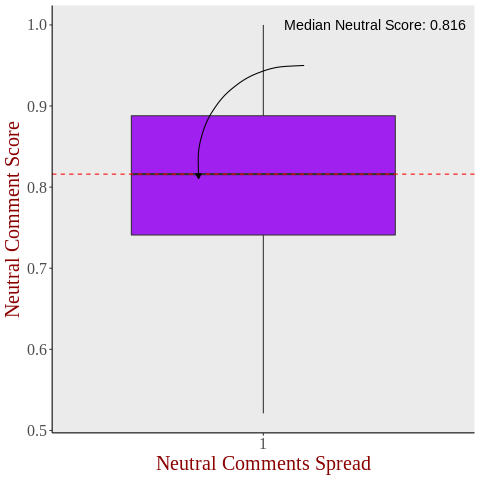

In [ ]:
%%R

neutral_comments_without_outliers <- polarity_scores_R_df %>% filter(Neutral_Comment >= 0.52)

neu_comment_boxplot <- ggplot(neutral_comments_without_outliers, aes(x=as.factor(1), y = Neutral_Comment)) 

neu_comment_median <- median(neutral_comments_without_outliers$Neutral_Comment)


neu_comment_boxplot + geom_boxplot(fill='purple') + 
                    labs(y = 'Neutral Comment Score', x = 'Neutral Comments Spread') + 
                    geom_hline(yintercept = neu_comment_median, linetype='dashed', color='red') + 
                    annotate("text", x = neu_comment_median + 0.5, y = 1.0, label='Median Neutral Score: 0.816', size=5) + 
                    annotate('curve', x = neu_comment_median + 0.3, y = 0.95, xend=neu_comment_median, yend=0.8105, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

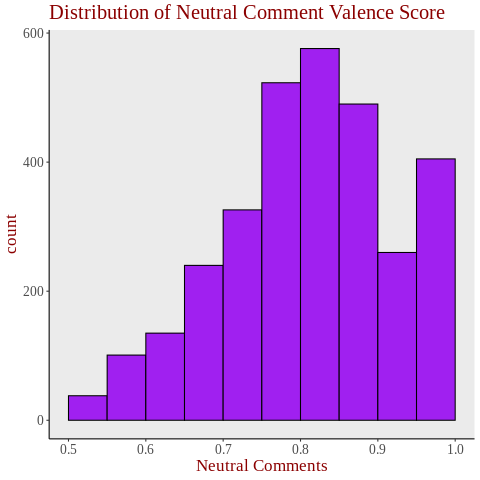

In [ ]:
%%R


neutral_comments_viz <- ggplot(neutral_comments_without_outliers, aes(x=Neutral_Comment))

neutral_comments_viz + geom_histogram(binwidth=0.05, center=0.025, fill='purple', color='black') + labs(x='Neutral Comments', title='Distribution of Neutral Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

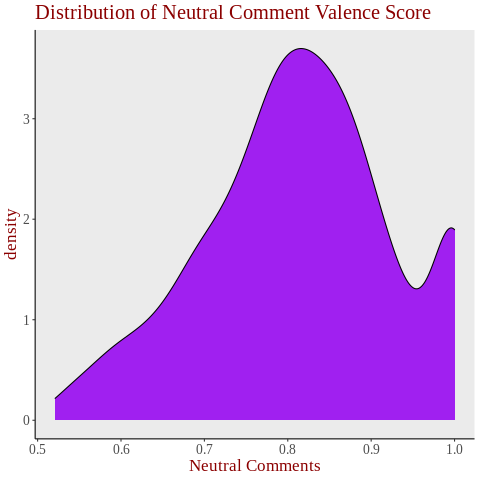

In [ ]:
%%R

neutral_comments_viz + geom_density(bw=0.025, fill='purple', color='black') + labs(x='Neutral Comments', title='Distribution of Neutral Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

# Neutral Comments Conclusion

The neutral comments distribution post outlier cleaning was able to display the bimodal shape more clearly.

There was a slight increase in the average from 0.801 to 0.816

Overall we can see that the majority of comments which were given a "neutral" 
score tend to be more on the positive side close to 1, rather than close to 0 which would indicate neutral.


It is interesting to point out that the average of the neutral comments distribution was much higher than the positive comments score distribution.





# Compound Comments Distribution

The compound score distribution will be interesting to look at since it is a weighted sum of the ratings.


It takes on a shape which is not skewed in either direction, this makes sense since the compound score is generally a score which takes the three values into account.

We see a single peak, where the majority of the samples fall near 0.

There are no outliers, so we do not have to do any analysis for this distribution. This is intuitive because of how the compound score is calculated.

The average of the compound score distribution is exactly 0, indicating that most of the comments were neutral on the valence score scale.

The density curve highlights this single peak, as well as a high variablity of samples near -1 and 1.

We can explore this distribution more clearly to see which comments were extremely negative and extremely positive




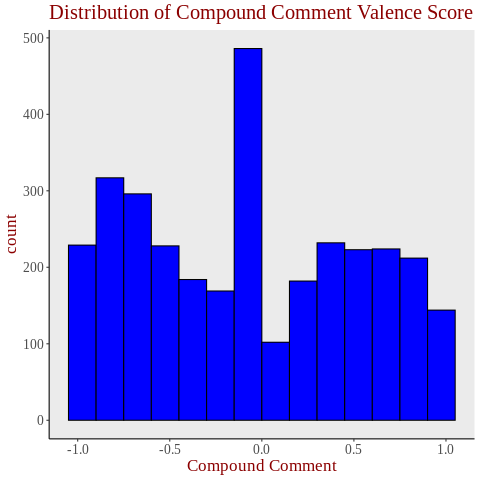

In [ ]:

%%R

comment_compound_viz <- ggplot(polarity_scores_R_df, aes(x=Comment_Compound)) 


comment_compound_viz + geom_histogram(binwidth=0.15, center=0.075, fill='blue', color='black') + labs(x='Compound Comment', title='Distribution of Compound Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)


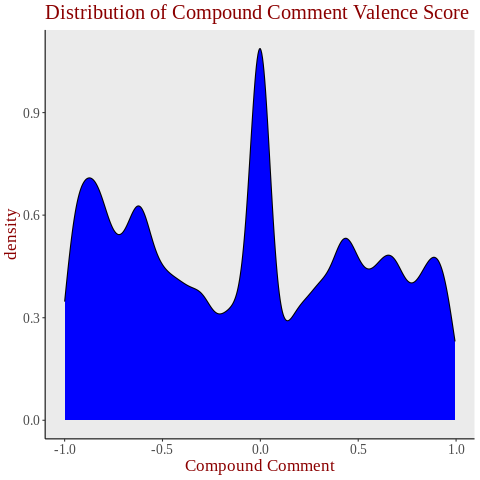

In [ ]:
%%R
comment_compound_viz + geom_density(bw=0.05, fill='blue', color='black') + labs(x='Compound Comment', title='Distribution of Compound Comment Valence Score') + theme(
    
    text = element_text(family='serif', size=17 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)

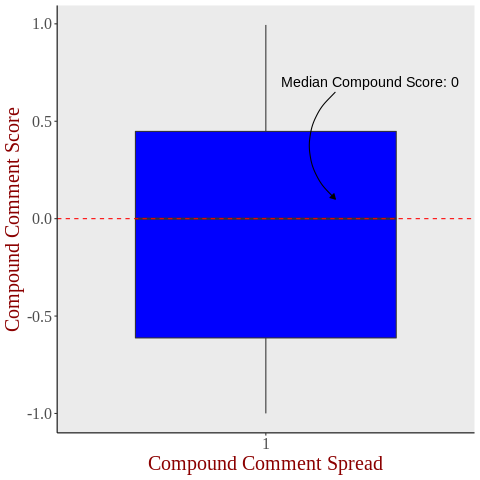

In [ ]:
%%R


                                                                
                                                                                                                              
comment_comp_boxplot <- ggplot(polarity_scores_R_df, aes(x=as.factor(1), y = Comment_Compound)) 

comment_comp_median <- median(polarity_scores_R_df$Comment_Compound)


comment_comp_boxplot + geom_boxplot(fill='blue') + 
                    labs(y = 'Compound Comment Score', x = 'Compound Comment Spread') + 
                    geom_hline(yintercept = comment_comp_median, linetype='dashed', color='red') + 
                    annotate("text", x = comment_comp_median + 1.3, y = 0.7, label='Median Compound Score: 0', size=5) + 
                    annotate('curve', x = comment_comp_median + 1.2, y = 0.65, xend=comment_comp_median + 1.2, yend=0.1, arrow=arrow(length = unit(0.2, "cm"), type='closed'), color='black') + theme(
    
    text = element_text(family='serif', size=20 ),
    panel.grid = element_blank(),
    title = element_text(color = '#8b0000'),
    axis.line = element_line(color='black')
)


# Most Negative, Neutral, and Positive Comments


The benefit of the compound score is that it has comments rated on a scale from -1 to 1.

Here we can now investigate the distribution to find samples which were the most negative, most postive, and most neutral.

I will group each valence score seperately and sample a few of the rows to get a sense of which comments fell in the neutral, negative, and positive categories

You can have a look for yourself to see how the comments differed in each category.

Note: for the negative and positive comment scores, I just filtered for a threshold above 0.99. 



In [ ]:
%%R
#Negative Comments 


most_negative_comments <- polarity_scores_R_df  %>% group_by(Comment_Compound) %>% filter(Comment_Compound < -0.99) %>% arrange(Comment_Compound) %>% ungroup()


most_negative_comments$Comments







 [1] "You useless piece of shit. You absolute waste of space and air. You uneducated, ignorant, idiotic dumb swine, you're an absolute embarrassment to humanity and all life as a whole. The magnitude of your failure just now is so indescribably massive that one hundred years into the future your name will be used as moniker of evil for heretics. Even if all of humanity put together their collective intelligence there is no conceivable way they could have thought up a way to fuck up on the unimaginable scale you just did. When Jesus died for our sins, he must not have seen the sacrilegious act we just witnessed you performing, because if he did he would have forsaken humanity long ago so that your birth may have never become reality. After you die, your skeleton will be displayed in a museum after being scientifically researched so that all future generations may learn not to generate your bone structure, because every tiny detail anyone may have in common with you degrades them to a us

In [ ]:
%%R

#Neutral Comments

most_neutral_comments <- polarity_scores_R_df %>% group_by(Comment_Compound) %>% filter(Comment_Compound == 0) %>% top_n(10) %>% ungroup() %>% sample_n(10) 

most_neutral_comments$Comments



#Interesting..... This is one sample, many more can be taken




R[write to console]: Selecting by Comment_Compound



 [1] "They could be paying their black drivers more"                                                                                                                                                                                                   
 [2] "But are you white though?"                                                                                                                                                                                                                       
 [3] "you have to have a blacklist, and you have to stick to it. if you notice a trend that you're waiting around for long periods at some places, maybe you should never go back. use your time on orders you can finish quicker. that's how i see it"
 [4] "I just see black"                                                                                                                                                                                                                                
 [5] "\"

In [ ]:
%%R

#Comments

most_positive_comments <- polarity_scores_R_df %>% group_by(Comment_Compound) %>% filter(Comment_Compound >= 0.99) %>% arrange(desc(Comment_Compound)) %>% ungroup()

most_positive_comments$Comments 

[1] "I don't smoke meth, I go there to relay facts in hopes to get another person to stop before it's to late, \nBut....... I'm well aware of how men/women search for validation by searching for faults with the one they wish to not hear. That's ok, but I've met even drunks and meth-heads who have had and have come to a profound knowledge of the truth, God is above all, within and near all, nothing can really come between, it's all a matter of choice, but you've found your reasons to discredit me based off of a subreddit I'm in, ( another well known caucasian deficiency) they even wrote the law that says \" look through a mans past to discredit and disqualify \" \n\nThat's why satan seen his fall, it's why hitler literally killed the people who looked like him, they both jealous envy I. Their hearts, and they both said \" there is no God\". \nSo I've just likened you into satan and hitler, all based off of this thread you've shown me who and what you are,\n\nBut, people change as sudden

# Comment Score vs Valence Scores


Lets see if there is any relationship between the Comment Score for a comment and a Valence Score associated with it.


The Comment Score is calculated as the number of upvotes - number of downvotes

Lets investigate to see if a scores rating has any relationship to VaderSentiment valence scores



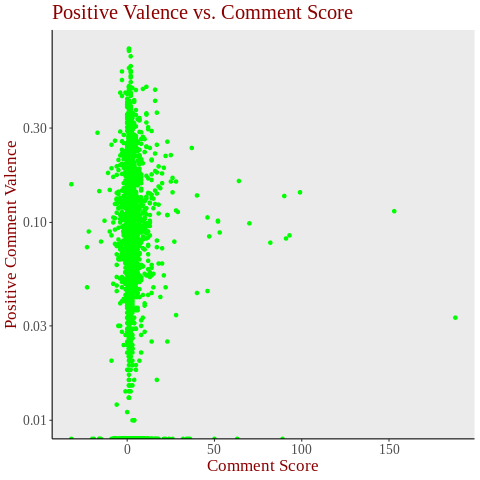

In [ ]:
%%R
#Comment Score vs. Positve Valence Score

commentscore_vs_positive <- ggplot(polarity_scores_R_df, aes(x=Comment_Score, y=Pos_Comment)) + geom_point(color='green') + scale_y_log10() + 
                              labs(x='Comment Score', y='Positive Comment Valence', title='Positive Valence vs. Comment Score') + theme(
    
                                                                             text = element_text(family='serif', size=17 ),
                                                                            panel.grid = element_blank(),
                                                                            title = element_text(color = '#8b0000'),
                                                                            axis.line = element_line(color='black')
                                                                            )


commentscore_vs_positive 



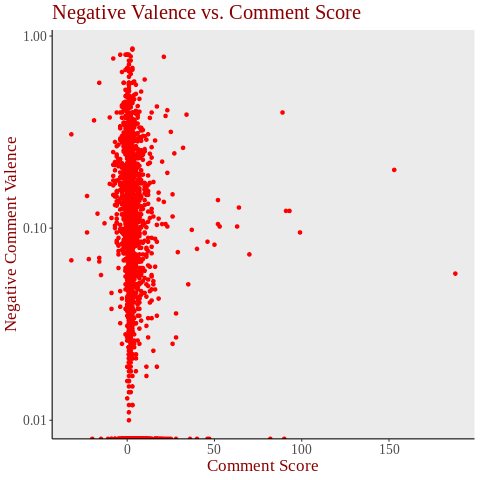

In [ ]:
%%R
#Comment Score vs. Negative Valence Score

commentscore_vs_negative <- ggplot(polarity_scores_R_df, aes(x=Comment_Score, y=Neg_Comment)) + geom_point(color='red') + scale_y_log10() + 
                              labs(x='Comment Score', y='Negative Comment Valence', title='Negative Valence vs. Comment Score') + theme(
    
                                                                             text = element_text(family='serif', size=17 ),
                                                                            panel.grid = element_blank(),
                                                                            title = element_text(color = '#8b0000'),
                                                                            axis.line = element_line(color='black')
                                                                            )
                              

commentscore_vs_negative


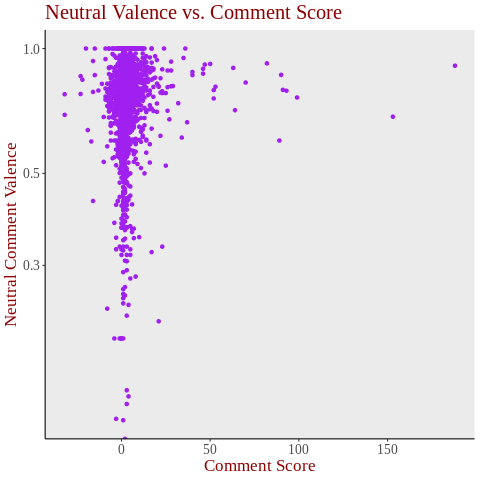

In [ ]:
%%R

#Comment Score vs Neutral Valence Score

commentscore_vs_neutral <- ggplot(polarity_scores_R_df, aes(x=Comment_Score, y=Neutral_Comment)) + geom_point(color='purple') + scale_y_log10() + 
                              labs(x='Comment Score', y='Neutral Comment Valence', title='Neutral Valence vs. Comment Score') + theme(
    
                                                                             text = element_text(family='serif', size=17 ),
                                                                            panel.grid = element_blank(),
                                                                            title = element_text(color = '#8b0000'),
                                                                            axis.line = element_line(color='black')
                                                                            )
                              
                              
                              

commentscore_vs_neutral


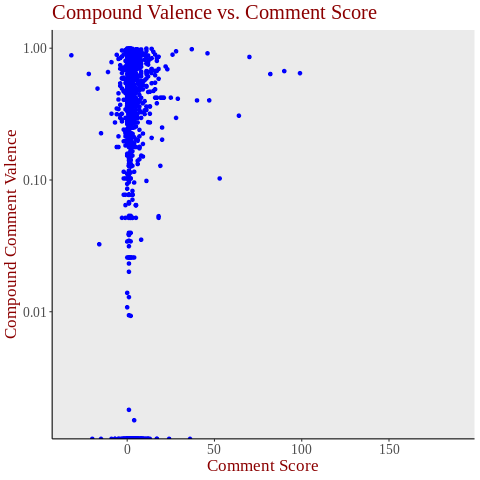

In [ ]:
%%R
#Comment Score vs. Compound Valence Score

commentscore_vs_compound <- ggplot(polarity_scores_R_df, aes(x=Comment_Score, y=Comment_Compound)) + geom_point(color='blue') + scale_y_log10() + 
                              labs(x='Comment Score', y='Compound Comment Valence', title='Compound Valence vs. Comment Score') + theme(
    
                                                                             text = element_text(family='serif', size=17 ),
                                                                            panel.grid = element_blank(),
                                                                            title = element_text(color = '#8b0000'),
                                                                            axis.line = element_line(color='black')
                                                                            )
                              
                              
                              

commentscore_vs_compound

# Need for Regression?

Doesn't seem like there is much of a relationship between the score of a comment and the valence scores.

This makes sense because VaderSentiment does not take the Comment Score feature into account, so there shouldn't really be much of a relationship.


We could run a linear regression analysis to go deeper, but the task at hand is to analyze the comments with topic modeling.

Since there is no real relationship, no reason to run regression models for now.



# Vectorization


Vectorization is another important step in the sentiment analysis workflow.

Vectorization is important in that it allows us to transform our character strings into numerical format for LDA modeling later on. 

The arguments take in the stop words of interest to us, the ngram range, and any token pattern.

The vectorizer will return to us a transformed dataframe of the comments, except with features being individual words.

This is great because separating out tokens like this will help in topic modeling later on, as well as for visualizations


In [ ]:
#create comment vectorizer

comment_vect = TfidfVectorizer(stop_words=even_more_stop_words, max_features=200, ngram_range=(1,2), token_pattern=r'\b[^\d\W][^\d\W]+\b')


In [ ]:
comment_vect.fit(search_terms_results['Comments'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=200,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'.', "I'm", "I've", 'LOL', 'a', 'about',
                                      'above', 'across', 'actually', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', ...}),
                strip_accents=None, sublinear_tf=False,
                token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b', tokenizer=None,
   

In [ ]:
comments_transformed = comment_vect.transform(search_terms_results['Comments'])

In [ ]:
comments_transformed_df = pd.DataFrame(comments_transformed.toarray(), columns=comment_vect.get_feature_names())

In [ ]:
comment_vect.get_feature_names()

In [ ]:
comment_vect.vocabulary_

In [ ]:
comments_transformed_df

,able,accept,account,address,ago,aren,ask,ass,avoid,away,bad,bag,based,best,better,big,bit,black,black people,blacklist,blacklisted,building,business,called,car,care,certain,change,color,com,comp,cops,customer,customers,dash,dasher,dashers,days,dd,definitely,...,support,sure,suspicious,taking,tell,things,thought,times,tip,tips,told,took,try,trying,uber,understand,use,used,usually,ve,versus,wage,wait,waiting,week,weeks,went,white,white people,won,work,worker,worker comp,working,wouldn,wrong,yeah,year,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.286562,0.0,0.0,0.0,0.334733,0.0,0.000000,...,0.000000,0.0,0.284031,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.612312,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106466,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.081162,0.0,0.0,0.468170,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083904,0.000000,0.0,0.0,0.0,0.000000,0.0,0.114515,...,0.000000,0.0,0.000000,0.0,0.000000,0.101635,0.0,0.0,0.000000,0.000000,0.0,0.0,0.197659,0.0,0.0,0.0,0.292377,0.0,0.000000,0.219134,0.0,0.0,0.0,0.0,0.0,0.227018,0.0,0.000000,0.0,0.105278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.600768,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.318674,0.0,0.000000,0.0,0.306742,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.226307,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.319981,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.587489,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.285384,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.343895,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.246253,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.165028,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.

In [ ]:
vocabulary_df = pd.DataFrame([comment_vect.vocabulary_])

In [ ]:
vocabulary_df

,days,tips,mean,customers,paid,suspicious,started,ve,business,use,people,problem,don,pay,doesn,money,matter,hours,won,definitely,try,postmates,customer,service,end,weeks,away,blacklist,list,things,need,long,tip,racist,getting,support,tell,saying,feel,life,...,waiting,restaurants,night,job,dashers,working,oh,happened,dd,income,numbers,year,live,blacklisted,dasher,low,important,post,wage,police,versus,dash,week,mile,store,places,employee,employees,insurance,offer,gigs,prop,worker,engaged,comp,minimum wage,worker comp,streamable,https streamable,streamable com
0,37,169,106,33,124,162,154,179,22,176,126,139,51,125,49,112,104,78,189,39,172,136,32,150,58,185,9,19,93,165,113,98,168,143,68,160,164,147,64,91,...,183,146,116,87,36,193,121,73,38,83,119,197,96,20,35,101,82,135,181,134,180,34,184,107,156,132,56,57,84,120,69,140,191,59,30,110,192,157,81,158


In [ ]:
vocabulary_features = pd.DataFrame([comment_vect.get_feature_names()])

In [ ]:
vocabulary_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,able,accept,account,address,ago,aren,ask,ass,avoid,away,bad,bag,based,best,better,big,bit,black,black people,blacklist,blacklisted,building,business,called,car,care,certain,change,color,com,comp,cops,customer,customers,dash,dasher,dashers,days,dd,definitely,...,support,sure,suspicious,taking,tell,things,thought,times,tip,tips,told,took,try,trying,uber,understand,use,used,usually,ve,versus,wage,wait,waiting,week,weeks,went,white,white people,won,work,worker,worker comp,working,wouldn,wrong,yeah,year,years,yes


In [ ]:
# Helper function found from Medium
def plot_10_most_common_words(count_data, tfidf_vectorizer):
    
    words = tfidf_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

    

# Most Common Words

Here we see the top words in our transformed vectorized dataframe.

One thing to take notice is how the words from our search results helped us filter down to the comments relating to racial bias.

We see the top 3 words

"Black", "White", "Racist"

are words of interest to us when looking for racial bias

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


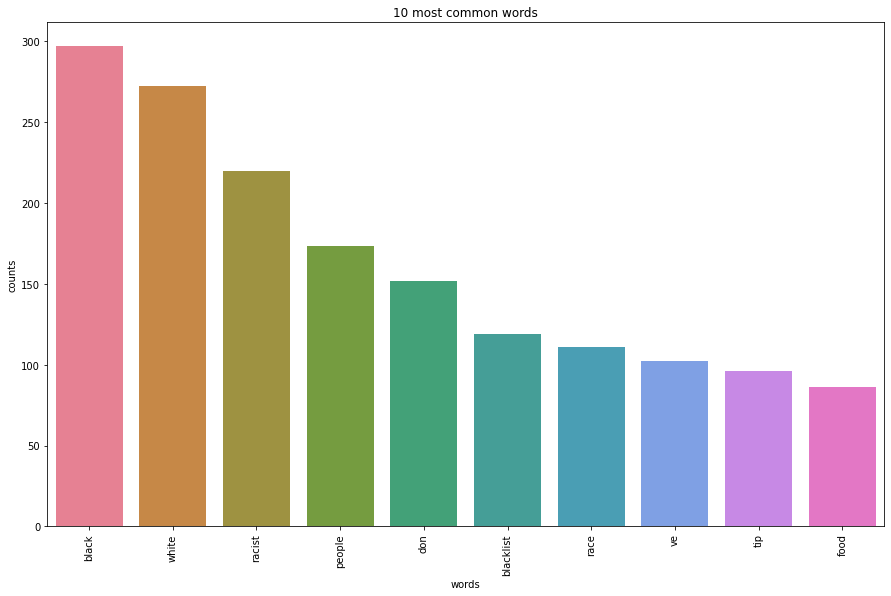

In [ ]:
plot_10_most_common_words(comments_transformed, comment_vect)

# Latent Dirichlet Allocation (LDA)

LDA in simplest terms, is the process of assigning topics to documents, based on the words associated with it.

LDA is a statistical model which will help in assigning each of the features from our transformed vector to a topic based on the words occurence in each document.

In our case, each "document" is our comments, so we are interested in seeing, what the probability distributions of the words are amongst the documents, and assign the words with the highest probabilities to the specific topic relating to the document.

This is how topic modeling works.





# Model Creation

Here we will be creating 5 LDA models for our analysis:

*   5 topic LDA model
*   10 topic LDA model
*   15 topic LDA model
*   20 topic LDA model
*   50 topic LDA model


We will fit these models on our transformed vectorized dataframe from before, and then analyze the results.



In [ ]:
#Function for LDA
def create_LDA_model(numTopics):
  comment_lda_topics = LatentDirichletAllocation(n_components=numTopics)
  comment_lda_topics.fit(comments_transformed)
  return comment_lda_topics

In [ ]:
comment_lda_five_topics = create_LDA_model(5)

comment_lda_five_topics

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
comment_lda_ten_topics = create_LDA_model(10)

comment_lda_ten_topics

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
comment_lda_fifteen_topics = create_LDA_model(15)

comment_lda_fifteen_topics

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
comment_lda_twenty_topics = create_LDA_model(20)

comment_lda_twenty_topics

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
comment_lda_fifty_topics = create_LDA_model(50)

comment_lda_fifty_topics

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=50, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
comment_lda_five_topics_matrix = comment_lda_five_topics.transform(comments_transformed)

In [ ]:
comment_lda_ten_topics_matrix = comment_lda_ten_topics.transform(comments_transformed)

In [ ]:
comment_lda_fifteen_topics_matrix = comment_lda_fifteen_topics.transform(comments_transformed)

In [ ]:
comment_lda_twenty_topics_matrix = comment_lda_twenty_topics.transform(comments_transformed)

In [ ]:
comment_lda_fifty_topics_matrix = comment_lda_fifty_topics.transform(comments_transformed)

# Generated Topics


We will now print out the topics for each model, and then visualize the results in a neat dashboard provided the pyLDAvis package.



In [ ]:
#Helper function from medium
def print_topics(model, tfidf_vectorizer, n_top_words):
    words = tfidf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        


In [ ]:
print_topics(comment_lda_five_topics, comment_vect, 10)


Topic #0:
tip suspicious black food white delivery house car don night

Topic #1:
blacklisted minutes door told support customer reason phone wait ago

Topic #2:
blacklist orders dd restaurants screen ll don ass doordash accept

Topic #3:
black white people black people bag guy white people nice don tip

Topic #4:
racist race people racism don shit black white person color


In [ ]:
print_topics(comment_lda_ten_topics, comment_vect, 10)


Topic #0:
white blacklisted house screen address number ve oh ago night

Topic #1:
guy white people good white people black car yeah ass cops

Topic #2:
people black black people racist police list called makes literally period

Topic #3:
racism race people racist don live color issue job care

Topic #4:
door suspicious didn probably food leave fucking took tip away

Topic #5:
doordash bag dasher phone delivery use dd account ll customer

Topic #6:
blacklist orders restaurants wait food minutes place places blacklisted driver

Topic #7:
black tip white don maybe matter shit people dont look

Topic #8:
racist race https post com nice don people white fuck

Topic #9:
tips tip pay work deliveries hours don offer hour money


In [ ]:
print_topics(comment_lda_fifteen_topics, comment_vect, 10)


Topic #0:
tip race tips don delivered people black white delivery based

Topic #1:
doordash deliveries days pay week dash literally business store number

Topic #2:
account support yeah mean does trying discrimination dd white doesn

Topic #3:
things definitely problem feel start race big different don doing

Topic #4:
guy little house white getting maybe live black street ll

Topic #5:
blacklisted phone fucking ass period non took told especially orders

Topic #6:
food service good ve don years people ago taking certain

Topic #7:
shit look numbers thought old white black saying people making

Topic #8:
black black people people post racist nice dont don matter makes

Topic #9:
white racism people color white people screen police cops racist don

Topic #10:
wait blacklist orders customers dashers night places waiting minutes dd

Topic #11:
offer accept hours employees paid low minimum hour mile wage

Topic #12:
blacklist bag black https restaurants com orders list pretty postmates

T

In [ ]:
print_topics(comment_lda_twenty_topics, comment_vect, 10)


Topic #0:
blacklisted wait place minutes orders ass ago told blacklist tell

Topic #1:
pretty police certain started taking new mean black insurance white

Topic #2:
fucking period yes definitely business home racist point makes non

Topic #3:
racist house post fuck street number things don black isn

Topic #4:
phone old dasher didn week year white wouldn use working

Topic #5:
screen door white leave need issue ve seen having little

Topic #6:
delivered deliveries tip dash delivery cops usually away black tips

Topic #7:
problem support days try years discrimination nice good white work

Topic #8:
people tip white white people person don black live racist tips

Topic #9:
people black people black oh dont stop job racist understand service

Topic #10:
accept matter offer ask took uber let miles aren don

Topic #11:
racism yeah numbers life people probably fact color used race

Topic #12:
suspicious big car thought happened went wrong customer saying don

Topic #13:
deliver account car

In [ ]:
print_topics(comment_lda_fifty_topics, comment_vect, 10)


Topic #0:
let lot things hours start end ve sure ll seen

Topic #1:
phone happened away white use screen account maybe wouldn suspicious

Topic #2:
blacklist certain customers ll wait use don customer orders long

Topic #3:
accept makes avoid mile tip racist orders don pay point

Topic #4:
restaurants thought seen ve black bag away change bad white

Topic #5:
oh fact year people black white mean years racist getting

Topic #6:
new started white doordash restaurants orders place delivery ve bag

Topic #7:
doordash good job deliveries working ve white work hours pay

Topic #8:
bag person pretty black sure delivery white use car restaurants

Topic #9:
racist stop people years need bad yes isn gigs getting

Topic #10:
list black restaurants end pick minutes fuck places driver line

Topic #11:
deliver delivery driver food won uber don doordash black people

Topic #12:
little saying non having white racist didn person don use

Topic #13:
aren discrimination care use people reason isn new bu

# Topic Visualization with pyLDAvis

Its hard to really intepret anything without making a visualization, lets look at each model and their resulting topics with pyLDAvis

Each topic is represented in blue as a circle, and on the right you can checkout the most salient terms within each topic

Saliency refers to the words which are weighted by the most prominence in each topic. It allows us to visualize the most important words within each topic, and their weights are calculated in order to determine their ranking.



In [ ]:
pyLDAvis.enable_notebook()



five_topic_comment_dashboard = pyLDAvis.sklearn.prepare(comment_lda_five_topics, comments_transformed, comment_vect)

five_topic_comment_dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.016946  0.015949       1        1  24.351237
4      0.165917 -0.188561       2        1  21.696889
2     -0.152337  0.007704       3        1  20.365850
1     -0.151609 -0.023396       4        1  18.349796
3      0.154974  0.188304       5        1  15.236228, topic_info=          Term        Freq       Total Category  logprob  loglift
143     racist  205.000000  205.000000  Default  30.0000  30.0000
17       black  299.000000  299.000000  Default  29.0000  29.0000
187      white  274.000000  274.000000  Default  28.0000  28.0000
19   blacklist  116.000000  116.000000  Default  27.0000  27.0000
141       race  104.000000  104.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
179         ve   12.907464  100.775098   Topic5  -4.4738  -0.1736
169       tips    9.947131   44.187409   Topic5  -4.7343   0.3903
100        lot    9.647885   40.745354   Topic5  -4.7649   0.4409
136  postmates    8.957648   33.302881   Topic5  -4.8391   0.5684
13        best    7.628069   27.018844   Topic5  -4.9998   0.6168

[226 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.316209     able
0         4  0.677591     able
1         3  0.981817   accept
2         4  0.944808  account
3         1  0.314920  address
...     ...       ...      ...
197       3  0.050611     year
198       1  0.137576    years
198       2  0.206364    years
198       4  0.481516    years
198       5  0.171970    years

[528 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

In [ ]:
pyLDAvis.enable_notebook()

ten_topic_comment_dashboard = pyLDAvis.sklearn.prepare(comment_lda_ten_topics, comments_transformed, comment_vect)

ten_topic_comment_dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.177210 -0.023093       1        1  15.241690
9     -0.114058  0.042126       2        1  12.025592
3      0.108324  0.037647       3        1  11.292545
5     -0.155125 -0.041534       4        1  10.620163
4     -0.095159  0.012403       5        1  10.530573
1      0.027422  0.087768       6        1   8.758245
0     -0.102702 -0.142893       7        1   8.663542
2      0.099695  0.090000       8        1   8.631369
7      0.138714  0.135651       9        1   8.038304
8      0.270098 -0.198075      10        1   6.197977, topic_info=           Term        Freq       Total Category  logprob  loglift
143      racist  229.000000  229.000000  Default  30.0000  30.0000
17        black  292.000000  292.000000  Default  29.0000  29.0000
187       white  267.000000  267.000000  Default  28.0000  28.0000
19    blacklist  109.000000  109.000000  Default  27.0000  27.0000
141        race  114.000000  114.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
157  streamable    0.105864    2.021615  Topic10  -8.3778  -0.1685
6           ask    1.212777   27.396287  Topic10  -5.9393  -0.3365
10          bad    1.662651   38.541387  Topic10  -5.6238  -0.3624
187       white    9.717654  267.782420  Topic10  -3.8582  -0.5353
17        black    8.219783  292.195774  Topic10  -4.0256  -0.7899

[399 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.143108    able
0         2  0.095405    able
0         4  0.477025    able
0         5  0.238513    able
1         1  0.035175  accept
...     ...       ...     ...
199       5  0.128249     yes
199       7  0.096187     yes
199       8  0.416809     yes
199       9  0.032062     yes
199      10  0.032062     yes

[1049 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 4, 6, 5, 2, 1, 3, 8, 9])

In [ ]:
pyLDAvis.enable_notebook()

fifteen_topic_comment_dashboard = pyLDAvis.sklearn.prepare(comment_lda_fifteen_topics, comments_transformed, comment_vect)

fifteen_topic_comment_dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.062840  0.064387       1        1  11.075110
6     -0.072296  0.013153       2        1   9.823466
9      0.139733  0.078471       3        1   9.578992
10    -0.150844 -0.030980       4        1   9.308428
7      0.085238  0.069538       5        1   6.725257
3      0.023655  0.044424       6        1   6.484877
0      0.065583  0.083971       7        1   6.270336
8      0.239197 -0.063322       8        1   5.912752
11    -0.163066 -0.224148       9        1   5.741560
12    -0.110592 -0.068075      10        1   5.654662
5     -0.106476  0.068522      11        1   5.357831
1     -0.138915 -0.017856      12        1   4.838659
4      0.067501  0.140747      13        1   4.632493
14     0.234390 -0.227390      14        1   4.468188
2     -0.050270  0.068557      15        1   4.127389, topic_info=          Term        Freq       Total Category  logprob  loglift
143     racist  226.000000  226.000000  Default  30.0000  30.0000
17       black  285.000000  285.000000  Default  29.0000  29.0000
19   blacklist  115.000000  115.000000  Default  28.0000  28.0000
168        tip   94.000000   94.000000  Default  27.0000  27.0000
187      white  251.000000  251.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
187      white   11.804155  251.185064  Topic15  -3.2571   0.1298
51         don    4.937404  147.795718  Topic15  -4.1288  -0.2115
54    doordash    3.612901   66.789111  Topic15  -4.4411   0.2705
17       black    4.060032  285.061407  Topic15  -4.3244  -1.0640
70        good    2.592251   63.609937  Topic15  -4.7731  -0.0127

[588 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.093261  able
0         2  0.139891  able
0         3  0.046630  able
0         4  0.233151  able
0         5  0.233151  able
...     ...       ...   ...
199      11  0.031619   yes
199      12  0.158097   yes
199      13  0.094858   yes
199      14  0.094858   yes
199      15  0.031619   yes

[1283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 10, 11, 8, 4, 1, 9, 12, 13, 6, 2, 5, 15, 3])

In [ ]:
pyLDAvis.enable_notebook()

twenty_topic_comment_dashboard = pyLDAvis.sklearn.prepare(comment_lda_twenty_topics, comments_transformed, comment_vect)

twenty_topic_comment_dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.146077  0.019675       1        1  7.855824
9     -0.127258 -0.047687       2        1  6.703413
8     -0.137822 -0.095907       3        1  6.644729
6      0.110138 -0.040676       4        1  6.515921
18     0.145470  0.024590       5        1  6.450962
12     0.048878 -0.110713       6        1  6.178511
4      0.069861 -0.083832       7        1  5.613052
5      0.033395 -0.069547       8        1  5.374792
13     0.040370 -0.023667       9        1  5.124550
15     0.045214 -0.128924      10        1  4.706370
11    -0.199207 -0.064954      11        1  4.648675
17     0.102494  0.246878      12        1  4.422354
10     0.060458  0.021922      13        1  4.199094
3     -0.223182  0.223616      14        1  4.071990
14     0.251162  0.071048      15        1  4.021630
19    -0.114273  0.029941      16        1  3.852790
2     -0.150080  0.107916      17        1  3.823326
16    -0.154688 -0.093134      18        1  3.665442
1      0.057713 -0.049876      19        1  3.189289
7     -0.004722  0.063332      20        1  2.937286, topic_info=          Term        Freq       Total Category  logprob  loglift
143     racist  206.000000  206.000000  Default  30.0000  30.0000
187      white  260.000000  260.000000  Default  29.0000  29.0000
19   blacklist  119.000000  119.000000  Default  28.0000  28.0000
141       race  113.000000  113.000000  Default  27.0000  27.0000
17       black  280.000000  280.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
167      times    0.670714   37.353750  Topic20  -5.7848  -0.4922
49       doesn    0.858453   47.979940  Topic20  -5.5381  -0.4957
19   blacklist    1.584882  119.679286  Topic20  -4.9249  -0.7966
123     orders    1.060932   80.201239  Topic20  -5.3263  -0.7977
99        look    0.610512   43.243673  Topic20  -5.8789  -0.7326

[763 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.046502  able
0         6  0.046502  able
0         7  0.139507  able
0         8  0.232512  able
0         9  0.279015  able
...     ...       ...   ...
199      11  0.030307   yes
199      13  0.060614   yes
199      16  0.090920   yes
199      17  0.515216   yes
199      20  0.030307   yes

[1381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 9, 7, 19, 13, 5, 6, 14, 16, 12, 18, 11, 4, 15, 20, 3, 17, 2, 8])

In [ ]:
pyLDAvis.enable_notebook()

fifty_topic_comment_dashboard = pyLDAvis.sklearn.prepare(comment_lda_fifty_topics, comments_transformed, comment_vect)

fifty_topic_comment_dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
26    -0.074003 -0.104890       1        1  3.615704
33    -0.097818  0.007584       2        1  3.458908
46    -0.106984  0.097106       3        1  3.409067
25     0.081314 -0.025434       4        1  3.288809
16    -0.061518  0.034370       5        1  2.705883
38    -0.160935  0.053559       6        1  2.657146
17     0.156531  0.024759       7        1  2.573554
8     -0.006226 -0.187723       8        1  2.492558
48    -0.136857  0.059223       9        1  2.432709
24    -0.006024 -0.046721      10        1  2.413566
36     0.212498  0.015215      11        1  2.359595
37    -0.024330 -0.175875      12        1  2.304746
20     0.225337 -0.095425      13        1  2.275038
31     0.090407 -0.038270      14        1  2.263696
21    -0.145051  0.066453      15        1  2.252710
39     0.207641  0.082761      16        1  2.223745
7     -0.107846  0.029769      17        1  2.219645
19    -0.174438  0.062439      18        1  2.135104
32     0.171770 -0.062838      19        1  2.118158
9      0.206464  0.169439      20        1  2.098452
1     -0.063362 -0.023833      21        1  2.051496
2     -0.185543  0.083800      22        1  2.049699
44    -0.009278  0.070554      23        1  2.019421
47     0.129795  0.099579      24        1  1.994051
43    -0.030363 -0.158242      25        1  1.992621
23    -0.078543  0.040764      26        1  1.983737
28     0.132452  0.019200      27        1  1.927001
12     0.113399 -0.032962      28        1  1.924813
42    -0.026633 -0.057251      29        1  1.907852
11    -0.118180 -0.005476      30        1  1.903995
3     -0.001591  0.060958      31        1  1.866097
14    -0.030263 -0.047763      32        1  1.764342
27    -0.111900 -0.052296      33        1  1.742866
45    -0.027822 -0.073529      34        1  1.671783
18    -0.037414  0.104921      35        1  1.627012
4      0.003297 -0.099142      36        1  1.621734
0     -0.109518  0.043697      37        1  1.602818
35     0.094138 -0.294495      38        1  1.582068
30     0.016175 -0.030953      39        1  1.559167
5      0.149163 -0.012250      40        1  1.499446
29    -0.120302 -0.064453      41        1  1.459256
15     0.142124  0.132295      42        1  1.444774
34    -0.095299  0.067431      43        1  1.402384
41    -0.096975  0.076233      44        1  1.378714
13     0.008245  0.107436      45        1  1.376822
40     0.132357  0.123190      46        1  1.290040
49     0.098519  0.102687      47        1  1.164919
10    -0.044751 -0.224201      48        1  1.119852
6     -0.078564  0.026842      49        1  0.985886
22    -0.003295  0.051757      50        1  0.786540, topic_info=          Term        Freq       Total Category  logprob  loglift
143     racist  188.000000  188.000000  Default  30.0000  30.0000
17       black  275.000000  275.000000  Default  29.0000  29.0000
19   blacklist  105.000000  105.000000  Default  28.0000  28.0000
142     racism   66.000000   66.000000  Default  27.0000  27.0000
187      white  242.000000  242.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
52        dont    0.045555   27.473093  Topic50  -7.1567  -1.5568
51         don    0.045555  147.032294  Topic50  -7.1567  -3.2342
70        good    0.045555   64.005796  Topic50  -7.1567  -2.4025
199        yes    0.045555   32.226500  Topic50  -7.1567  -1.7163
72         guy    0.045555   55.941605  Topic50  -7.1567  -2.2679

[1863 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.795418    able
0         9  0.099427    able
0        31  0.049714    able
1         3  0.033966  accept
1        10  0.033966  accept
...     ...       ...     ...
199      28  0.062061     yes
199      34  0.403395     yes
199      42  0.031030     yes
199      45  0.062061     yes
199      48

# Topic Modeling Conclusion

After the analysis it is safe to say that there can definitely be more work done.

The reader of this script can go through and visualize the results on each of these dashboards, and they would agree that there is really not much of a distinction between a lot of these topics.

Certain topics which are of interest are the ones which contain high saliency in terms like "racist", "black", "suspicious". However, even this is not enough for us to conclude racial bias amongst topics.

I think there can be improvements made in the following areas:

- Better preprocessing

I think that I could definitely try and filter out more useless words. words like "lot", "oh", "does" are words that can definitely be included in the stop words list.

However, it is not good to remove too many words, as it can lower the sample size of tokens to work with.

- Quality of Data:

Something I noticed is that comments on Reddit tend to be quite short. I had talked about this earlier when doing EDA on the distributions of the valence scores that alot of the comments were so short that Vader was not able to accurately attach a valence score to them because it had to deal with comments which weren't long enough. This is merely a hypothesis, not something I can conclude.

My intuition is that comments like "thats racist" may carry some weight for vader to attach a valence score, but not merely enough compared to a comment which is a complete sentence.


I am definitely open to suggestions on how to improve my overall workflow, as this was my first time conducting a Sentiment Analysis, and text data in general.

I learned alot throughout this whole process, and dipped my toe into the fascinating sub field of text analytics.

It would be interesting to take this a step further and to try and use Deep Learning Methods to see what kinds of results we could get. 